# Piyush Verma
### 230968114
#### Deep Learning Lab 
Week 4 - Cats and Dogs

In [2]:
from keras.callbacks import History
from keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import DirectoryIterator, ImageDataGenerator

## Preprocessing and Organizing Directories for LeNet-5 (input image size 128x128)

In [4]:
train_datagen_128 = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip = True,
    vertical_flip = True,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True
)
val_datagen_128 = ImageDataGenerator(rescale=1./255)
test_datagen_128 = ImageDataGenerator(rescale=1./255)

In [3]:
base_dir = "cats_and_dogs_filtered"
train_dir = f"{base_dir}/train"
validation_dir = f"{base_dir}/validation"
test_dir = f"{base_dir}/test"

In [4]:
train_generator_128 = train_datagen_128.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=20,
    class_mode="categorical"  
)

val_generator_128 = val_datagen_128.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=20,
    class_mode="categorical"
)

test_generator_128 = test_datagen_128.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=20,
    class_mode="categorical"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


## Preprocessing and organizing directories for AlexNet (input image size 227x227)

In [5]:
train_datagen_227 = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip = True,
    vertical_flip = True,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True
)
val_datagen_227 = ImageDataGenerator(rescale=1./255)
test_datagen_227 = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator_227 = train_datagen_227.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=20,
    class_mode="categorical"
)

val_generator_227 = val_datagen_227.flow_from_directory(
    validation_dir,
    target_size=(227, 227),
    batch_size=20,
    class_mode="categorical"
)

test_generator_227 = test_datagen_227.flow_from_directory(
    test_dir,
    target_size=(227, 227),
    batch_size=20,
    class_mode="categorical"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


### 1) LeNet-5

In [7]:
LeNet5_model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(6, kernel_size=5, padding="same", activation="tanh"),
    MaxPooling2D(pool_size=2, strides=2),
    Conv2D(16, kernel_size=5, activation="tanh"),
    MaxPooling2D(pool_size=2, strides=2),
    Flatten(),
    Dense(120, activation="tanh"),
    Dense(84, activation="tanh"),
    Dense(2, activation="softmax")
])

I0000 00:00:1755151910.812084  375478 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10161 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


### 2) AlexNet

In [8]:
AlexNet_model = Sequential([
    Input(shape=(227, 227, 3)),
    Conv2D(96, kernel_size=11, strides=4, activation='relu'),
    MaxPooling2D(pool_size=3, strides=2),
    Conv2D(256, kernel_size=5, padding='same', activation='relu'),
    MaxPooling2D(pool_size=3, strides=2),
    Conv2D(384, kernel_size=3, padding='same', activation='relu'),
    Conv2D(384, kernel_size=3, padding='same', activation='relu'),
    Conv2D(256, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=3, strides=2),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

## Compiling the models

In [9]:
LeNet5_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

AlexNet_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

## Training LeNet-5

In [10]:
epochs = 40

LeNet5_history = LeNet5_model.fit(
    train_generator_128,
    validation_data=val_generator_128,
    epochs=epochs
)

Epoch 1/40


/home/student/miniconda3/envs/tf-gpu/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/home/student/miniconda3/envs/tf-gpu/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/home/student/miniconda3/envs/tf-gpu/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
I0000 00:00:17551

  5/100 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4513 - loss: 2.5026

I0000 00:00:1755151920.733982  375781 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 75ms/step - accuracy: 0.5258 - loss: 1.1143 - val_accuracy: 0.5000 - val_loss: 0.7884
Epoch 2/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.5754 - loss: 0.6776 - val_accuracy: 0.4980 - val_loss: 0.8610
Epoch 3/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.6142 - loss: 0.6494 - val_accuracy: 0.5020 - val_loss: 0.7324
Epoch 4/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.6117 - loss: 0.6496 - val_accuracy: 0.5640 - val_loss: 0.6975
Epoch 5/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.6020 - loss: 0.6624 - val_accuracy: 0.6050 - val_loss: 0.6493
Epoch 6/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.6290 - loss: 0.6495 - val_accuracy: 0.5070 - val_loss: 0.7512
Epoch 7/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.6307 - loss: 0.6441 - val_accuracy: 0.5350 - val_loss: 0.7037
Epoch 8/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.6332 - loss: 0.6418 - val_accuracy: 0.55

## Evaluating LeNet-5

In [11]:
lenet5_test_loss, lenet5_test_acc = LeNet5_model.evaluate(test_generator_128)
print(f"LeNet-5 Test accuracy: {lenet5_test_acc:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5171 - loss: 1.1246
LeNet-5 Test accuracy: 0.5050


Inference : Bad test accuracy due to lack of preprocessing (data augmentation) and usage of primitive model

## Training AlexNet

In [12]:
AlexNet_history = AlexNet_model.fit(
    train_generator_227,
    validation_data=val_generator_227,
    epochs=epochs
)

Epoch 1/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4642 - loss: 1.4590

2025-08-14 11:46:34.458859: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_130_0', 36 bytes spill stores, 36 bytes spill loads

2025-08-14 11:46:34.512638: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_137', 80 bytes spill stores, 80 bytes spill loads

2025-08-14 11:46:34.787139: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_137', 100 bytes spill stores, 100 bytes spill loads

2025-08-14 11:46:34.960651: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_130', 4 bytes spill stores, 4 bytes spill loads

2025-08-14 11:46:35.237602: I external/loc

100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 139ms/step - accuracy: 0.4643 - loss: 1.4533 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 2/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.5109 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 3/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.4917 - loss: 0.6941 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.4970 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.5223 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.5181 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 7/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.5185 - loss: 0.6926 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 8/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.5046 - loss: 0.6932 - val_accuracy: 0.5

## Evaluating AlexNet

In [13]:
alexnet_test_loss, alexnet_test_acc = AlexNet_model.evaluate(test_generator_227)
print(f"AlexNet Test accuracy: {alexnet_test_acc:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4689 - loss: 0.6932
AlexNet Test accuracy: 0.5000


Inference : Bad test accuracy due to lack of preprocessing (data augmentation) and usage of primitive model

## Plotting Accuracy and Loss for Both Models

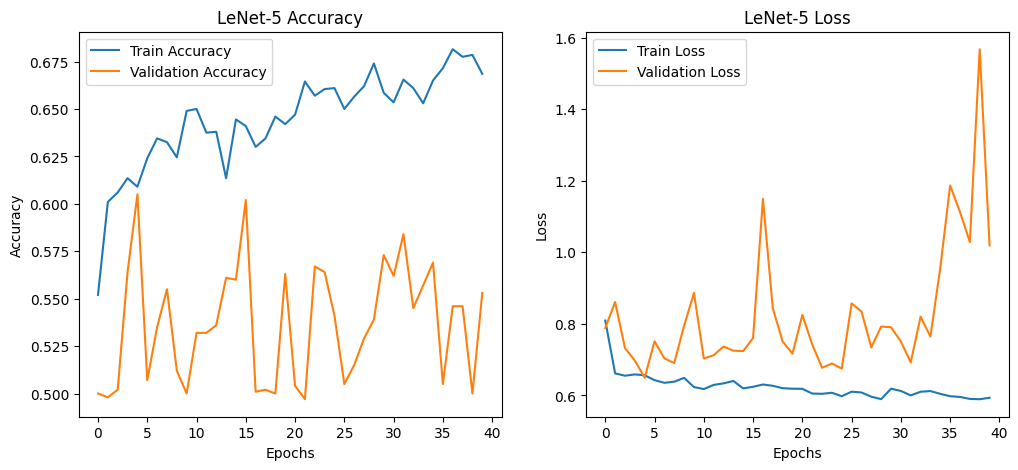

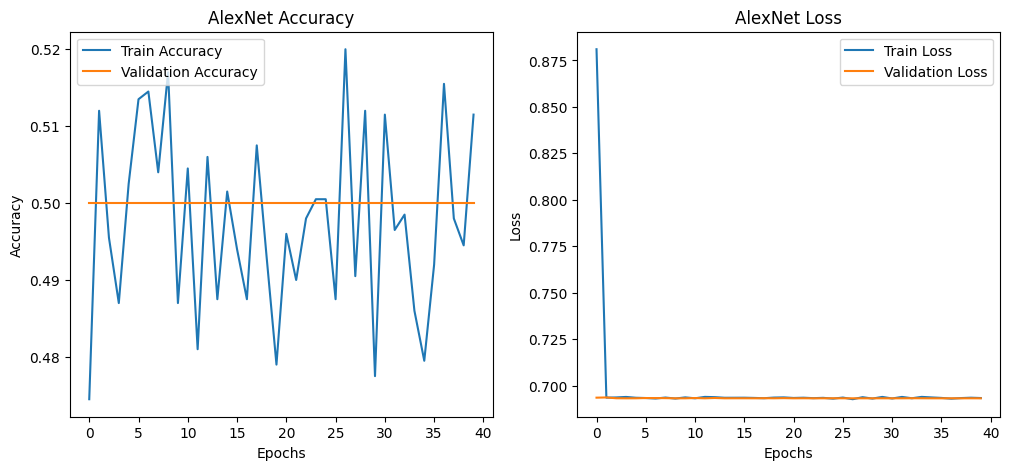

In [15]:
import matplotlib.pyplot as plt
def plot_history(history, model_name):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(LeNet5_history, 'LeNet-5')

plot_history(AlexNet_history, 'AlexNet')

Inference: Lack of clear correlation of accuracy and loss with epochs in most cases

## Getting summary for both models

In [16]:
print("LeNet 5 summary:")
LeNet5_model.summary()
print("AlexNet summary:")
AlexNet_model.summary()

LeNet 5 summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │     1,728,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,223,980 (19.93 MB)

 Trainable params: 1,741,326 (6.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,482,654 (13.29 MB)

AlexNet summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 174,868,616 (667.07 MB)

 Trainable params: 58,289,538 (222.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 116,579,078 (444.71 MB)

Inference : AlexNet has many more trainable parameters than LeNet-5 due to having more layers and a more complex architecture

## 2) Using transfer learning models on the Cats and Dogs dataset

In [17]:
from tensorflow.keras.applications import VGG16, InceptionV3, ResNet50, EfficientNetB0, MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

## Preprocessing and organizing directories for VGG16, ResNet50, EfficientNetB0 and MobileNetV2 (All have same input image sizes)

In [18]:
batch_size = 20

train_datagen_224 = ImageDataGenerator(rescale=1./255)
val_datagen_224 = ImageDataGenerator(rescale=1./255)
test_datagen_224 = ImageDataGenerator(rescale=1./255)

train_generator_224 = train_datagen_224.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator_224 = val_datagen_224.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator_224 = test_datagen_224.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


## Preprocessing and organizing directories for InceptionV3

In [19]:
train_datagen_299 = ImageDataGenerator(rescale=1./255)
val_datagen_299 = ImageDataGenerator(rescale=1./255)
test_datagen_299 = ImageDataGenerator(rescale=1./255)

train_generator_299 = train_datagen_299.flow_from_directory(
    train_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator_299 = val_datagen_299.flow_from_directory(
    validation_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator_299 = test_datagen_299.flow_from_directory(
    test_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


## Model 1 : VGG16

In [20]:
base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_vgg.trainable = False

model_vgg = Sequential([
    base_model_vgg,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model_vgg.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

print("Training VGG16...")
history_vgg = model_vgg.fit(
    train_generator_224,
    validation_data=val_generator_224,
    epochs=5
)

print("Evaluating VGG16 on test data:")
loss_vgg, acc_vgg = model_vgg.evaluate(test_generator_224)
print(f"VGG16 Test accuracy: {acc_vgg:.4f}")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training VGG16...
Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7110 - loss: 0.5604

2025-08-14 11:56:43.682604: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_220', 4 bytes spill stores, 4 bytes spill loads



100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 139ms/step - accuracy: 0.7117 - loss: 0.5591 - val_accuracy: 0.8920 - val_loss: 0.2528
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.9121 - loss: 0.2217 - val_accuracy: 0.9020 - val_loss: 0.2342
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.9416 - loss: 0.1565 - val_accuracy: 0.9020 - val_loss: 0.2322
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 114ms/step - accuracy: 0.9582 - loss: 0.1212 - val_accuracy: 0.9120 - val_loss: 0.2230
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 114ms/step - accuracy: 0.9674 - loss: 0.0876 - val_accuracy: 0.9080 - val_loss: 0.2106
Evaluating VGG16 on test data:
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.9919 - loss: 0.0396
VGG16 Test accuracy: 0.9900


Inference : High accuracy due to usage of transfer learning

## Model 2 : InceptionV3

In [21]:
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
base_model_inception.trainable = False

model_inception = Sequential([
    base_model_inception,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model_inception.compile(optimizer=Adam(learning_rate=1e-4),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

print("Training InceptionV3...")
history_inception = model_inception.fit(
    train_generator_299,
    validation_data=val_generator_299,
    epochs=5
)

print("Evaluating InceptionV3 on test data:")
loss_inception, acc_inception = model_inception.evaluate(test_generator_299)
print(f"InceptionV3 Test accuracy: {acc_inception:.4f}")

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Training InceptionV3...
Epoch 1/5


2025-08-14 11:57:56.733405: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_11433', 20 bytes spill stores, 20 bytes spill loads

2025-08-14 11:57:57.088257: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_11433', 32 bytes spill stores, 32 bytes spill loads

2025-08-14 11:57:57.680252: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_11433', 28 bytes spill stores, 32 bytes spill loads

2025-08-14 11:57:57.764935: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_8708', 236 bytes spill stores, 236 bytes spill loads

2025-08-14 11:57:57.902696: I exter

100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 156ms/step - accuracy: 0.8458 - loss: 0.3518 - val_accuracy: 0.9940 - val_loss: 0.0480
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.9922 - loss: 0.0498 - val_accuracy: 0.9940 - val_loss: 0.0346
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.9894 - loss: 0.0389 - val_accuracy: 0.9970 - val_loss: 0.0286
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.9943 - loss: 0.0241 - val_accuracy: 0.9940 - val_loss: 0.0222
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.9954 - loss: 0.0190 - val_accuracy: 0.9950 - val_loss: 0.0210
Evaluating InceptionV3 on test data:
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9903 - loss: 0.0192
InceptionV3 Test accuracy: 0.9900


Inference : High accuracy due to usage of transfer learning

## Model 3 : ResNet50

In [22]:
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_resnet.trainable = False

model_resnet = Sequential([
    base_model_resnet,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model_resnet.compile(optimizer=Adam(learning_rate=1e-4),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

print("Training ResNet50...")
history_resnet = model_resnet.fit(
    train_generator_224,
    validation_data=val_generator_224,
    epochs=5
)

print("Evaluating ResNet50 on test data:")
loss_resnet, acc_resnet = model_resnet.evaluate(test_generator_224)
print(f"ResNet50 Test accuracy: {acc_resnet:.4f}")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Training ResNet50...
Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 115ms/step - accuracy: 0.5277 - loss: 0.8434 - val_accuracy: 0.5600 - val_loss: 0.6732
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.5691 - loss: 0.7497 - val_accuracy: 0.5850 - val_loss: 0.6656
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.5824 - loss: 0.6799 - val_accuracy: 0.6190 - val_loss: 0.6581
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.6049 - loss: 0.6669 - val_accuracy: 0.6160 - val_loss: 0.6517
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.6013 - loss: 0.6612 - val_accuracy: 0.6240 - val_loss: 0.6513
Evaluating ResNet50 on test data:
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6505 - loss: 0.6537
ResNet50 Test accuracy: 0.6150


## Model 4 : EfficientNetB0

In [23]:
from tensorflow.keras.applications import EfficientNetB0

base_model_effnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_effnet.trainable = False

model_effnet = Sequential([
    base_model_effnet,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model_effnet.compile(optimizer=Adam(learning_rate=1e-4),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

print("Training EfficientNetB0...")
history_effnet = model_effnet.fit(
    train_generator_224,
    validation_data=val_generator_224,
    epochs=5
)

print("Evaluating EfficientNetB0 on test data:")
loss_effnet, acc_effnet = model_effnet.evaluate(test_generator_224)
print(f"EfficientNetB0 Test accuracy: {acc_effnet:.4f}")

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training EfficientNetB0...
Epoch 1/5


2025-08-14 12:00:16.263763: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_10887', 32 bytes spill stores, 32 bytes spill loads

2025-08-14 12:00:16.681233: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_10665_0', 404 bytes spill stores, 1284 bytes spill loads

2025-08-14 12:00:16.695112: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_10887', 28 bytes spill stores, 32 bytes spill loads

2025-08-14 12:00:16.891706: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_10887', 20 bytes spill stores, 20 bytes spill loads

2025-08-14 12:00:16.912656: I e

100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 151ms/step - accuracy: 0.4825 - loss: 0.7262 - val_accuracy: 0.5000 - val_loss: 0.7130
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.4911 - loss: 0.7158 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.5134 - loss: 0.6994 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.4944 - loss: 0.6978 - val_accuracy: 0.5000 - val_loss: 0.7000
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.5039 - loss: 0.6962 - val_accuracy: 0.5000 - val_loss: 0.6932
Evaluating EfficientNetB0 on test data:
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.4696 - loss: 0.6948
EfficientNetB0 Test accuracy: 0.5000


## Model 5 : MobileNetV2

In [24]:
from tensorflow.keras.applications import MobileNetV2

base_model_mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_mobilenet.trainable = False

model_mobilenet = Sequential([
    base_model_mobilenet,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model_mobilenet.compile(optimizer=Adam(learning_rate=1e-4),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

print("Training MobileNetV2...")
history_mobilenet = model_mobilenet.fit(
    train_generator_224,
    validation_data=val_generator_224,
    epochs=5
)

print("Evaluating MobileNetV2 on test data:")
loss_mobilenet, acc_mobilenet = model_mobilenet.evaluate(test_generator_224)
print(f"MobileNetV2 Test accuracy: {acc_mobilenet:.4f}")


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training MobileNetV2...
Epoch 1/5


2025-08-14 12:01:28.581994: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-08-14 12:01:28.697965: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 131ms/step - accuracy: 0.7950 - loss: 0.4148 - val_accuracy: 0.9730 - val_loss: 0.0801
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.9564 - loss: 0.1059 - val_accuracy: 0.9760 - val_loss: 0.0663
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.9750 - loss: 0.0752 - val_accuracy: 0.9790 - val_loss: 0.0614
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9844 - loss: 0.0501 - val_accuracy: 0.9800 - val_loss: 0.0604
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.9884 - loss: 0.0352 - val_accuracy: 0.9780 - val_loss: 0.0595
Evaluating MobileNetV2 on test data:
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9908 - loss: 0.0360
MobileNetV2 Test accuracy: 0.9950


## Model summaries

In [26]:
print("VGG16 summary: ")
model_vgg.summary()

VGG16 summary: 


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,984,584 (129.64 MB)

 Trainable params: 6,423,298 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 12,846,598 (49.01 MB)

In [27]:
print("InceptionV3 summary: ")
model_inception.summary()

InceptionV3 summary: 


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,377,960 (89.18 MB)

 Trainable params: 525,058 (2.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 1,050,118 (4.01 MB)

In [31]:
print("ResNet50 summary: ")
model_resnet.summary()

ResNet50 summary: 


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,162,888 (95.99 MB)

 Trainable params: 525,058 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 1,050,118 (4.01 MB)

In [28]:
print("ResNet50 summary: ")
model_resnet.summary()

ResNet50 summary: 


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,162,888 (95.99 MB)

 Trainable params: 525,058 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 1,050,118 (4.01 MB)

In [29]:
print("EfficientNetB0 summary: ")
model_effnet.summary()

EfficientNetB0 summary: 


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,034,923 (19.21 MB)

 Trainable params: 328,450 (1.25 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 656,902 (2.51 MB)

In [30]:
print("MobileNetV2 summary: ")
model_mobilenet.summary()

MobileNetV2 summary: 


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,336 (12.37 MB)

 Trainable params: 328,450 (1.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 656,902 (2.51 MB)

Inference : For all models the non-trainable parameters are much more than trainable parameters since only last 2 layers are added by us. Rest of the layers and weights are taken from the original architectures used for transfer learning